# Example 3 - Load polygons from a GDSII file

## About this example: load polygons from a GDSII file

This example is aimed at users who are familiar with GDSII files.

Citing from [Wikipedia](https://en.wikipedia.org/wiki/GDSII):

> GDSII stream format, common acronym GDSII, is a database file format which is the de facto industry standard for data exchange of integrated circuit or IC layout artwork. It is a binary file format representing planar geometric shapes, text labels, and other information about the layout in hierarchical form. The data can be used to reconstruct all or part of the artwork to be used in sharing layouts, transferring artwork between different tools, or creating photomasks. 

For example, for an experimentalist who designs and fabricates the sample in a clean room facility, it is common to work with GDSII files.

Here, the goal is to translate the polygons defined in a GDSII file to a shape which nextnano can understand.

The simplest example is that the GDSII file contains a simple square (in 2D) and you want to translate it into a cube (3D) in nextnano.

Especially for people who work with gated structures like 2DEG in GaAs heterostructures, the geometry of the gates are directly related to the physics behind. Moreover, these gated devices become more and more complicated in terms of the gate geometries.

If the user has to translate these geometries manually, it will take forever without mentioning the potential human error. Therefore, we started to develop a feature which can load the polygons from a GDSII file and then, the user can easily generate a desired nextnano shape.

For the moment, this feature has only few functionalities and it is limited by nextnano++ shapes. However, the idea is to expand it in the future.

## Requirements

You need to install [matplotlib](https://matplotlib.org/), [gdspy](https://gdspy.readthedocs.io/en/stable/), [Shapely](https://shapely.readthedocs.io/en/stable/).

We recommend to use the anaconda prompt to install these packages:

```
conda install matplotlib
pip install gdspy
conda install Shapely
```


## How to load the polygons from a GDSII file?

There is class called ```GdsPolygons``` which will load the polygons in a GDSII file:

```python
from nextnanopy.nnp.shapes import GdsPolygons
my_gds = GdsPolygons(path_to_file, unit='nm')
```

This object contains all the relevant information:
- number of polygons: via ```my_gds.nb_polygons```
- x and y coordinates of the vertexes: ```my_gds.polygons_xy``` or ```my_gds.xy``` (transposed array)
- labels: user-defined labels for each polygons

It has also an easy method to plot the polygons:

```python
my_gds.show()
```

You can generate the raw text of the shape for an input file by some defined method. For example, to get a polygonal_prism shape of 20 nm in the z direction, you can do:

```python
my_gds.get_polygon_prism(zi=0, zf=20)
```

For the moment, it is only implemented the shapes:
- obelisk (3D)
- polygonal_prism (3D)

In [1]:
import nextnanopy as nn
from nextnanopy.nnp.shapes import GdsPolygons

my_gds = GdsPolygons(r'..\..\tests\gds\example2.gds')

## Let's have a look at the polygons

Number of polygons: 2


<Axes: xlabel='x nm', ylabel='y nm'>

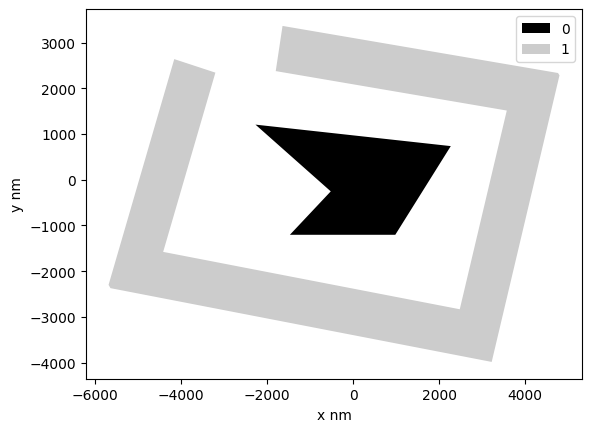

In [2]:
import matplotlib.pyplot as plt

print(f"Number of polygons: {my_gds.nb_polygons}")
my_gds.show()

## How to access the vertexes coordinates

This information is stored in:

```python
x,y = my_gds.xy
```

For example, the x and y for the second vertex of the first polygon are ```x[0][1]``` and ```y[0][1]```.

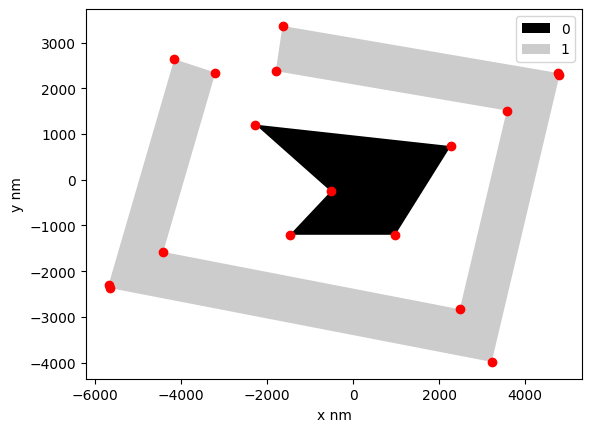

In [3]:
fig, ax = plt.subplots(1)
my_gds.show(ax=ax)

for xyi in my_gds.xy:
    xi, yi = xyi
    ax.plot(xi,yi,'ro')

## Set your own labels to the polygons

<Axes: xlabel='x nm', ylabel='y nm'>

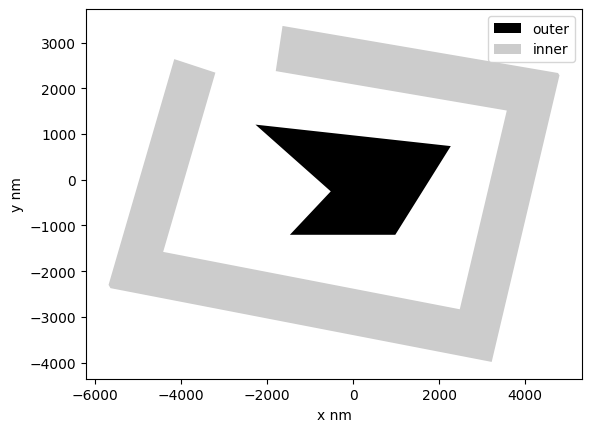

In [4]:
my_gds.labels = ['outer','inner']
my_gds.show()

## Get raw text of a polygonal_prism for the input file

The polygon from the GDSII file is a 2D geometry, but a polygonal_prism is a 3D object. So the user has to define the coordinates for the z direction via the arguments ```zi``` and ```zf``` in the method ```.get_polygonal_prism```

```python
list_of_shapes = my_gds.get_polygonal_prisms(zi=0,zf=20) # initial and final z coordinates are needed for this method
for shape in list_of_shapes:
    print(shape.text)
```

## Filter the polygons on import

When importing the geometry it is possible to limit import to:
* specific cells
* specific layers and datatypes

```python
my_gds = GdsPolygons(path_to_file, by_spec_filter=[(layer1, datatype1), (layer1, datatype2), (layer2, datatype1)...], cells=["cell_name1", "cell_name2"...])
# layer1, layer2, datatype1 and datatype2 are integers
```
In the example below, only polygons from cell "mycell" is imported, with polygons of datatype 0 from layer 1 and 2.

```python
my_gds = GdsPolygons(path_to_file, by_spec_filter=[(1, 0), (2, 0)], cells=["mycell"])
```

One can also filter only by cell or only by layer-datatype.

**Hint:** Default datatype is 0, if no datatypes are explicitly specified in GDSII file, all objects would have datatype 0.


<Axes: xlabel='x nm', ylabel='y nm'>

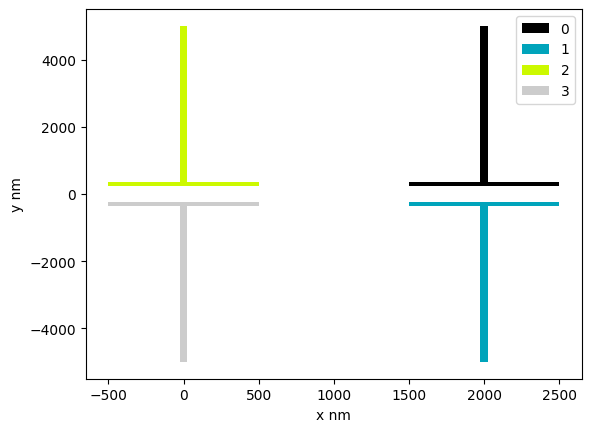

In [5]:
# importing whole example 1
my_gds = GdsPolygons(r'..\..\tests\gds\example1.gds')
my_gds.show()

<Axes: xlabel='x nm', ylabel='y nm'>

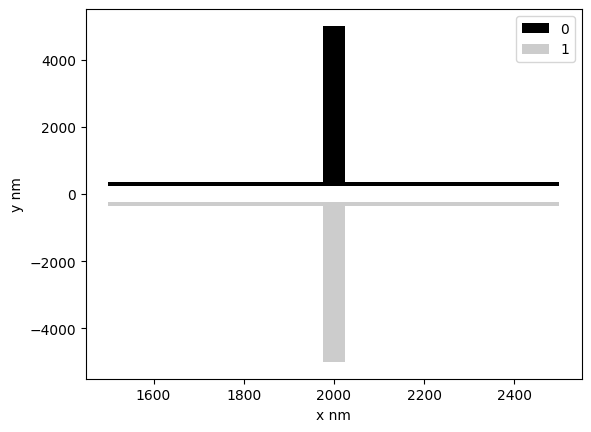

In [6]:
# importing only layer 1
my_gds = GdsPolygons(r'..\..\tests\gds\example1.gds', by_spec_filter=[(1,0)])
my_gds.show()

## Clip the polygons to rectangular box

After importing the polygons, one can clip them to the rectangular box.

```python
my_gds.clip((minx, miny, maxx, maxy))
```

<Axes: xlabel='x nm', ylabel='y nm'>

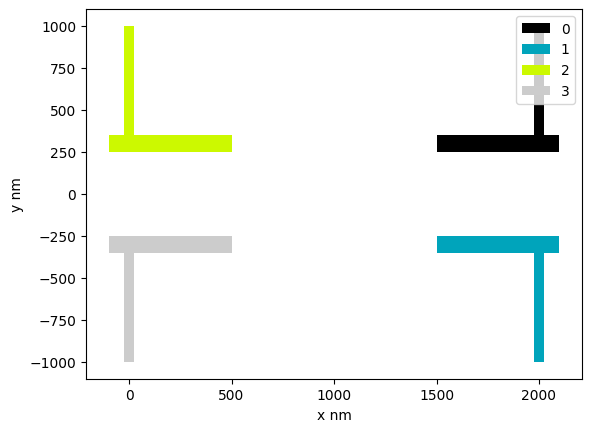

In [7]:
my_gds = GdsPolygons(r'..\..\tests\gds\example1.gds')
my_gds.clip((-100, -1000, 2100, 1000))
my_gds.show()

### nextnano++ polygonal prisms at different z-ranges
Using the filtering and/or clipping features, it is possible create polygonal prisms from with different z-ranges with polygons from one GDSII file.

In the example below, polygons from layer 1 are exported as prisms at z = (0, 10),  polygons from layer 2 are exported as prisms at z = (15, 20) 
```python
spec_filters = [(1, 0) , (2, 0)]
z_ranges = [(0, 10), (15, 20)]
result = [] # the resulting polygons will be appended here
for spec_filter, z_range in zip(spec_filters, z_ranges):
    gds = GdsPolygons(r'..\..\tests\gds\example1.gds', by_spec_filter=[spec_filter])
    list_of_shapes = gds.get_polygonal_prisms(zi=z_range[0], zf=z_range[1])
    result.extend(list_of_shapes) # add all objects (shapes) from list_of_shapes to result

# print the result
for shape in result:
    print(shape.text)
```
                      



Please contact python@nextnano.com for any issues with this document.